## 統計與深度學習 作業二

In [3]:
#### 下載必要 package
import pandas as pd
import pickle
import numpy as np
import collections  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
#### 檔案下載
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

### 第一題 [Data Preprocessing]
* 從 https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 下載檔案製作 dictionary
* 做資料清理

#### 下載資料並作成 csv檔案

In [5]:
training_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delimiter=',',names=['age','workclass', 'fnlwgt','education','educational-num'\
                                                         ,'marital-status','occupation','relationship','race'\
                                                         ,'gender','capital-gain','capital-loss'\
                                                         ,'hours-per-week','native-country','Class'])
testing_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', delimiter=',',names=['age','workclass', 'fnlwgt','education','educational-num'\
                                                         ,'marital-status','occupation','relationship','race'\
                                                         ,'gender','capital-gain','capital-loss'\
                                                         ,'hours-per-week','native-country','Class'])
training_data.replace(to_replace=[' ?'], value=np.nan, inplace=True)
testing_data.replace(to_replace=[' ?'], value=np.nan, inplace=True)


In [6]:
training_data = training_data[['capital-loss','hours-per-week','capital-gain','educational-num','age',\
                               'fnlwgt','relationship','race','gender','occupation','education','native-country',\
                               'workclass','marital-status','Class']]
testing_data = testing_data[['capital-loss','hours-per-week','capital-gain','educational-num','age',\
                             'fnlwgt','relationship','race','gender','occupation','education','native-country',\
                             'workclass','marital-status','Class']]

In [7]:
#### 把所有含有缺值的Rows刪除。
training_data = training_data[training_data["workclass"].notna()]
training_data = training_data[training_data["occupation"].notna()]
training_data = training_data[training_data["native-country"].notna()]
training_data.isnull().sum() #check for train nan
testing_data = testing_data[testing_data["workclass"].notna()]
testing_data = testing_data[testing_data["fnlwgt"].notna()]
testing_data = testing_data[testing_data["education"].notna()]
testing_data = testing_data[testing_data["educational-num"].notna()]
testing_data = testing_data[testing_data["marital-status"].notna()]
testing_data = testing_data[testing_data["occupation"].notna()]
testing_data = testing_data[testing_data["relationship"].notna()]
testing_data = testing_data[testing_data["race"].notna()]
testing_data = testing_data[testing_data["capital-gain"].notna()]
testing_data = testing_data[testing_data["capital-loss"].notna()]
testing_data = testing_data[testing_data["hours-per-week"].notna()]
testing_data = testing_data[testing_data["native-country"].notna()]
testing_data = testing_data[testing_data["gender"].notna()]
testing_data = testing_data[testing_data["Class"].notna()]
testing_data.isnull().sum() #check for test nan 

capital-loss       0
hours-per-week     0
capital-gain       0
educational-num    0
age                0
fnlwgt             0
relationship       0
race               0
gender             0
occupation         0
education          0
native-country     0
workclass          0
marital-status     0
Class              0
dtype: int64

In [8]:
#### 數據標準化
for col in training_data.describe():
  training_data[col]=preprocessing.scale(training_data[col])
for col in testing_data.describe():
  testing_data[col]=preprocessing.scale(testing_data[col])

In [9]:
#### 將它拆成 x_train(訓練特徵)、y_train(訓練標籤)、x_test(測試特徵)、y_test(測試標籤)。
train_x = training_data.drop(["Class"], axis=1)
train_y = training_data["Class"]
test_x = testing_data.drop(["Class"], axis=1)
test_y = testing_data["Class"]
train_x.head(10)

,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship,race,gender,occupation,education,native-country,workclass,marital-status
0,-0.218586,-0.077734,0.146092,1.128918,0.042796,-1.062722,Not-in-family,White,Male,Adm-clerical,Bachelors,United-States,State-gov,Never-married
1,-0.218586,-2.331531,-0.147445,1.128918,0.880288,-1.007871,Husband,White,Male,Exec-managerial,Bachelors,United-States,Self-emp-not-inc,Married-civ-spouse
2,-0.218586,-0.077734,-0.147445,-0.439738,-0.033340,0.244693,Not-in-family,White,Male,Handlers-cleaners,HS-grad,United-States,Private,Divorced
3,-0.218586,-0.077734,-0.147445,-1.224066,1.108695,0.425240,Husband,Black,Male,Handlers-cleaners,11th,United-States,Private,Married-civ-spouse
4,-0.218586,-0.077734,-0.147445,1.128918,-0.794697,1.406658,Wife,Black,Female,Prof-specialty,Bachelors,Cuba,Private,Married-civ-spouse
5,-0.218586,-0.077734,-0.147445,1.521083,-0.109476,0.897180,Wife,White,Female,Exec-managerial,Masters,United-States,Private,Married-civ-spouse
6,-0.218586,-2.081109,-0.147445,-2.008395,0.804152,-0.280232,Not-in-family,Black,Female,Other-service,9th,Jamaica,Private,Married-spouse-absent
7,-0.218586,0.339636,-0.147445,-0.439738,1.032559,0.187865,Husband,White,Male,Exec-managerial,HS-grad,United-States,Self-emp-not-inc,Married-civ-spouse
8,-0.218586,0.757005,1.754199,1.521083,-0.566290,-1.363097,Not-in-family,White,Female,Prof-specialty,Masters,United-States,Private,Never-married
9,-0.218586,-0.077734,0.551697,1.128918,0.271203,-0.287217,Husband,White,Male,Exec-managerial,Bachelors,United-States,Private,Married-civ-spouse


In [10]:
#### 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。其他欄位為特徵。
train_y_d = pd.get_dummies(train_y, drop_first=True)
test_y_d = pd.get_dummies(test_y, drop_first=True)

In [11]:
#### transform to dummy variable
train_x_d = pd.get_dummies(train_x)
test_x_d = pd.get_dummies(test_x)
train_x_d.head(10)

,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,...,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,-0.218586,-0.077734,0.146092,1.128918,0.042796,-1.062722,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.218586,-2.331531,-0.147445,1.128918,0.880288,-1.007871,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,-0.218586,-0.077734,-0.147445,-0.439738,-0.033340,0.244693,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-0.218586,-0.077734,-0.147445,-1.224066,1.108695,0.425240,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,-0.218586,-0.077734,-0.147445,1.128918,-0.794697,1.406658,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,-0.218586,-0.077734,-0.147445,1.521083,-0.109476,0.897180,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,-0.218586,-2.081109,-0.147445,-2.008395,0.804152,-0.280232,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,-0.218586,0.339636,-0.147445,-0.439738,1.032559,0.187865,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8,-0.218586,0.757005,1.754199,1.521083,-0.566290,-1.363097,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,-0.218586,-0.077734,0.551697,1.128918,0.271203,-0.287217,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [12]:
#### 刪除特徵值<10
for col in train_x_d:
  cnt=0
  for i in train_x_d[col]:
    if(i !=0):
      cnt+=1
  if(cnt<10):
    train_x_d = train_x_d.drop([col], axis=1)
train_x_d.head(20)

,capital-loss,hours-per-week,capital-gain,educational-num,age,fnlwgt,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Female,gender_ Male,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,...,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,-0.218586,-0.077734,0.146092,1.128918,0.042796,-1.062722,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.218586,-2.331531,-0.147445,1.128918,0.880288,-1.007871,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,-0.218586,-0.077734,-0.147445,-0.439738,-0.033340,0.244693,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-0.218586,-0.077734,-0.147445,-1.224066,1.108695,0.425240,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,-0.218586,-0.077734,-0.147445,1.128918,-0.794697,1.406658,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,-0.218586,-0.077734,-0.147445,1.521083,-0.109476,0.897180,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,-0.218586,-2.081109,-0.147445,-2.008395,0.804152,-0.280232,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,-0.218586,0.339636,-0.147445,-0.439738,1.032559,0.187865,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8,-0.218586,0.757005,1.754199,1.521083,-0.566290,-1.363097,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,-0.218586,-0.077734,0.551697,1.128918,0.271203,-0.287217,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### 製作 dictionary 

In [13]:
my_dict = {"x_train":[],"y_train":[],"x_test":[],"y_test":[],"columnname":[],"num_col":[]};

In [14]:
#### 製作num_col
for col in training_data.describe():
  my_dict["num_col"].append(col)
my_dict['num_col']

['capital-loss',
 'hours-per-week',
 'capital-gain',
 'educational-num',
 'age',
 'fnlwgt']

In [15]:
#### 製作columname
for col in train_x_d.describe():
  my_dict["columnname"].append(col)
my_dict['columnname'] = np.array(my_dict['columnname'])

In [16]:
#### 製作 x_train,y_train,x_test,y_test
for row in train_x_d.index:
  my_dict['x_train'].append(train_x_d.loc[row].tolist())
for row in train_y_d.index:
  my_dict['y_train'].append(train_y_d.loc[row].tolist())
for row in test_x_d.index:
  my_dict['x_test'].append(test_x_d.loc[row].tolist())
for row in test_y_d.index:
  my_dict['y_test'].append(test_x_d.loc[row].tolist())

In [17]:
my_dict['x_train'] = np.array(my_dict['x_train'])
my_dict['y_train'] = np.array(my_dict['y_train'])
my_dict['x_test'] = np.array(my_dict['x_test'])
my_dict['y_test'] = np.array(my_dict['x_train'])

#### 與正確答案比較

In [18]:
#### 下載檔案
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [19]:
#### 實際比較
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != my_dict[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)


x_train match!
x_test 1 elements no match!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


y_train 340172464 elements no match!
y_test 1 elements no match!


## 第二題 [ROC and AUC]

In [20]:
# load dataset
#### y_test = actual
#### ypred = scores

    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])  
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)  

Accuracy = 0.848406


#### 建立一個新的 ypredprob 做後面ROC計算

In [21]:
new_pred = ypredprob[:,1]
new_pred

array([0.00289291, 0.12248482, 0.3813629 , ..., 0.69731194, 0.28125578,
       0.79605483])

#### 建構一個ROC curve 繪圖器
步驟：
1. 建立一個 confusion matrix
2. 計算 tpr fpr
3. 繪圖  

參考資料 ： 
1. [roc from scratch](https://www.daniweb.com/programming/computer-science/tutorials/520084/understanding-roc-curves-from-scratch)
2. [sklearn roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

In [22]:
#### ROC
 
class my_ROC():
  def __init__(self, y_test, ypred):
    self.y_test = y_test
    self.ypred = ypred
  
  def cal_confusionMat(self, threshold, positive_label=1):
    confusionMat = collections.namedtuple('conf', ['tp','fp','tn','fn']) 
    tp=fp=tn=fn=0
    #bool_actuals = [y==positive_label for y in self.y_test]
    for truth, pred in zip(self.y_test, self.ypred):
        if pred > threshold:                       # predicted positive 
            if truth == positive_label:            # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if not (truth==positive_label):        # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1

    return confusionMat(tp, fp, tn, fn)

  def FPR(self,conf_mtrx):
    if(conf_mtrx.fp + conf_mtrx.tn)!=0:
      return conf_mtrx.fp / (conf_mtrx.fp + conf_mtrx.tn)

  def TPR(self,conf_mtrx):
    if(conf_mtrx.tp + conf_mtrx.fn)!=0:
      return conf_mtrx.tp / (conf_mtrx.tp + conf_mtrx.fn) 

  def cal_ROC(self,yred):

    # generate thresholds over score domain 
    low = min(ypred)
    high = max(ypred)
    step = (abs(low) + abs(high)) / 1000
    thresholds = np.arange(low-step, high+step, step)
    tpr=[]
    fpr=[]

    # calculate confusion matrices for all thresholds
    confusionMatrices = []
    for threshold in thresholds:
        confusionMatrices.append(self.cal_confusionMat(threshold))
    
    # calculate tpr/fpr for all thresholds
    for mat in confusionMatrices:
      tpr.append(self.TPR(mat))
      fpr.append(self.FPR(mat))

    return fpr,tpr,thresholds

  

In [23]:
#### ROC 
roc = my_ROC(adult50kp['y_test'],new_pred)
fpr,tpr,thresholds = roc.cal_ROC(new_pred)
auc = -1 * np.trapz(tpr, fpr)

In [24]:
tpr[:10]

[1.0,
 1.0,
 1.0,
 0.9997297297297297,
 0.9997297297297297,
 0.9997297297297297,
 0.9997297297297297,
 0.9997297297297297,
 0.9991891891891892,
 0.9989189189189189]

In [25]:
fpr[:10]

[1.0,
 1.0,
 0.9778169014084507,
 0.9464788732394366,
 0.9157570422535212,
 0.8858274647887324,
 0.8636443661971831,
 0.8435739436619718,
 0.8242077464788733,
 0.8060739436619718]

In [26]:
thresholds[:10]

array([-0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,
        0.007,  0.008])

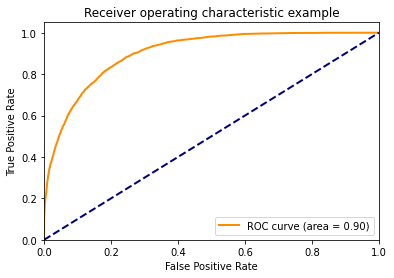

In [27]:
#### plot 
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## 第三題 [Logistic Regression with L2 Regularization]

#### Q3-1 Derive the gradient and hessian matrix for the new E(w).
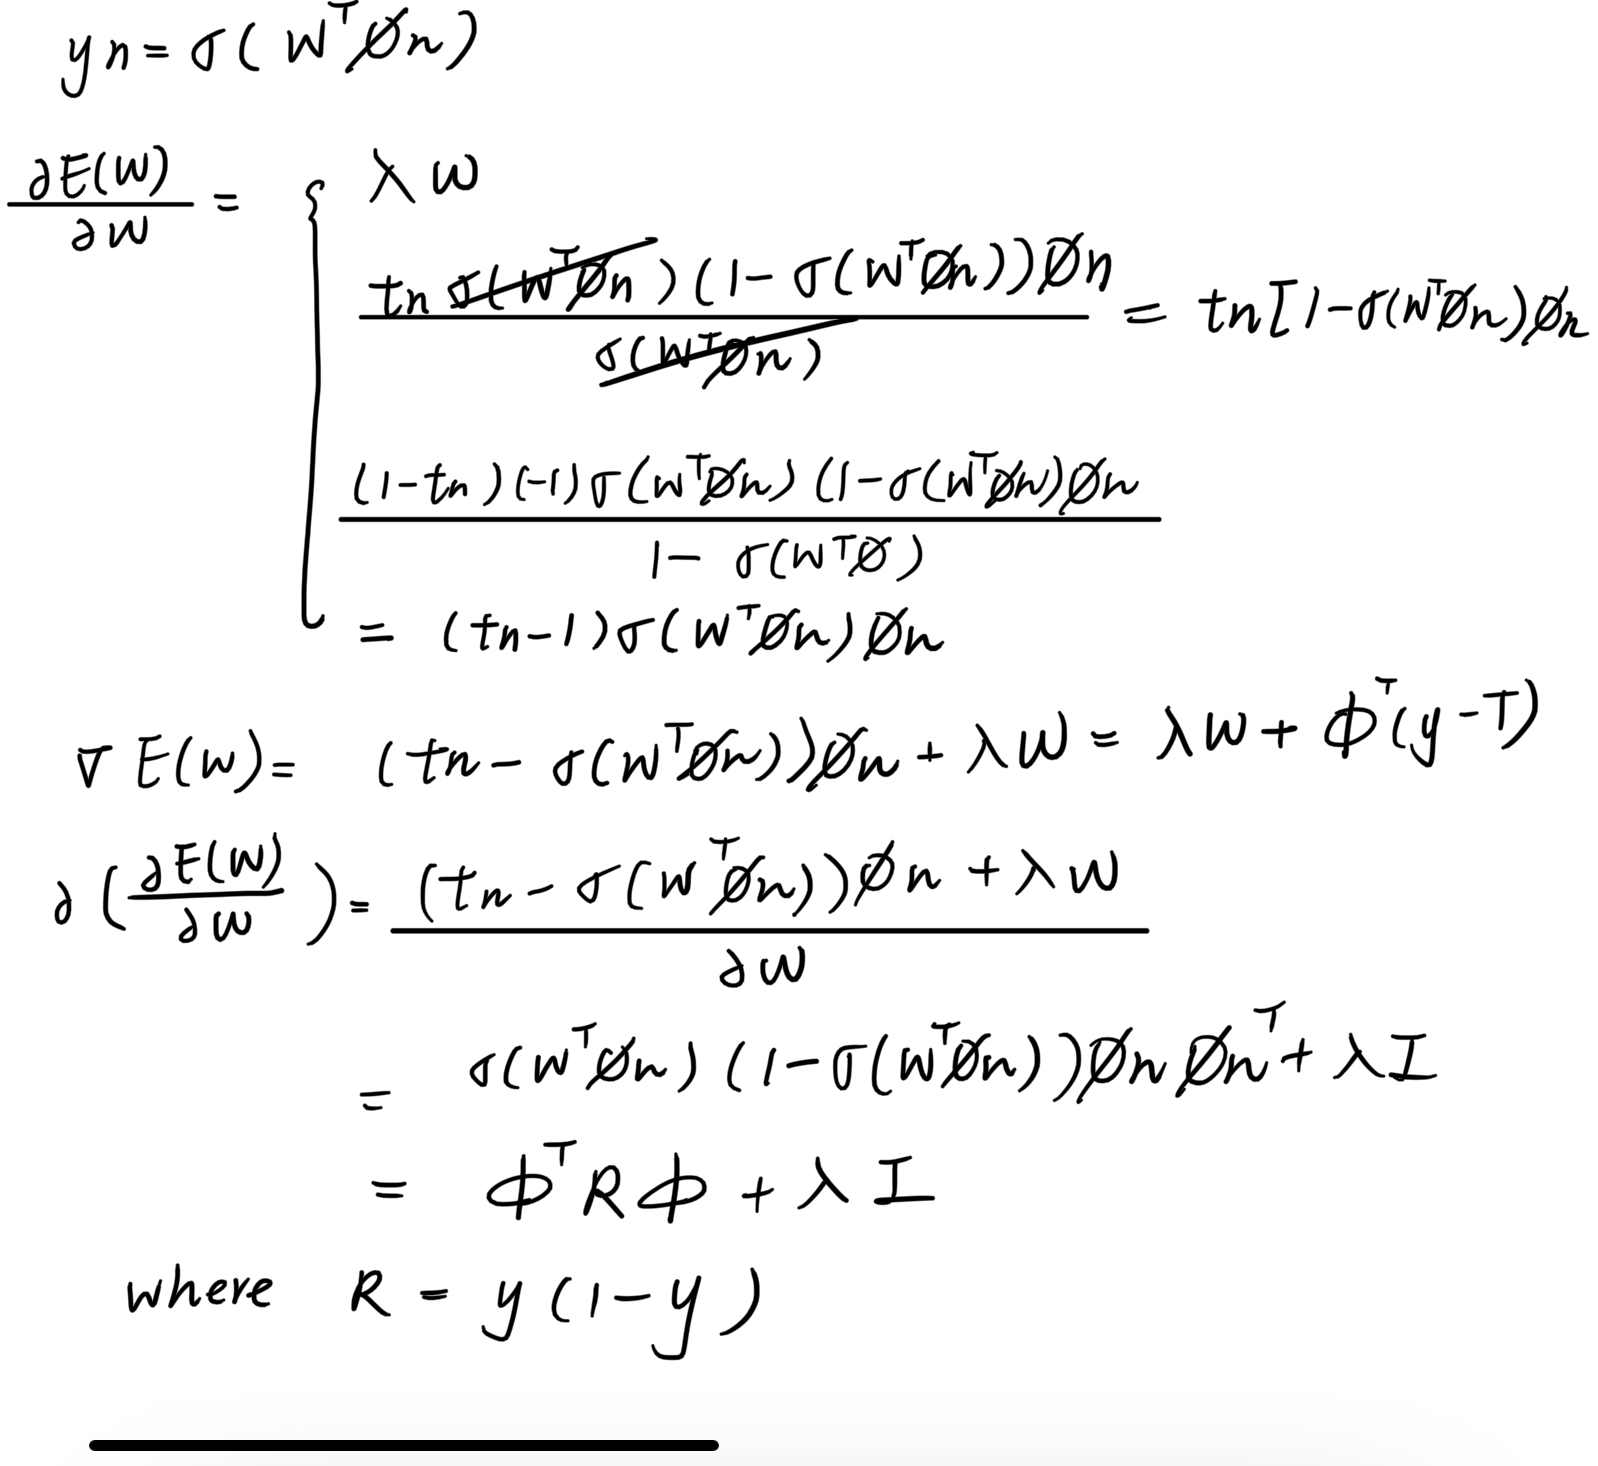

#### Q3-2 Create your mylogistic_l2 class

###### 製作製作 my_logistic
*  An extension of this model to allow different levels of regularization for different regression coefficients. 
* Three regularization coefficients: 0 for the constant, $a_1$ for continuous-valued features, and $a_2$ for the **binary-valued features**.
*  Train the model using the Newton-Raphson optimization method.
* 

In [29]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 1000, tol = 1e-5, add_intercept = True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        ### Add your code here
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    #### add_intercept    
    def __add_intercept(self,x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)

    #### sigmoid
    def sigmoid(self,z):
      return 1/(1+np.exp(-z))


    def newton_raphson(self, x, weight, label, lbd):
        #將矩陣大小記錄下來
        # x: 30162x103
        # weight: 103x1
        # lbd: 103x103
        
        y = x @ weight  # 30162x1
        prob = self.sigmoid(y)  # 30162x1
        R = np.diag(prob * (1-prob))  # 30162x30162
        gradient = x.T @ (prob-label) + lbd @ weight  # 103x1
        hessian = x.T @ R @ x + lbd @ np.eye(len(x.T @ R @ x))
        
        weight = weight - np.linalg.inv(hessian) @ gradient
        
        return weight


    #### fit with newtpn-raphson
    def fit(self, x, y, verbal = False):
        #Add your code here
        self.x = x
        self.y = y

        loss = np.inf

        if self.add_intercept:
          self.x = self.__add_intercept(self.x)
          self.weight = np.zeros(self.x.shape[1])
          for iter in range(self.max_iter):
            self.weight = self.newton_raphson(self.x, self.weight, self.y, self.reg_vec)
            new_y = self.sigmoid(self.x@self.weight)
            new_loss = np.sum(np.square(self.weight)@self.reg_vec) * 0.5 - np.sum(self.y * np.log(new_y) + (1-self.y) * np.log(1-new_y))

            if new_loss < loss:
              best_w = self.weight

            if (loss - new_loss) < self.tol:
              break
            loss = new_loss
          
            self.best_w = best_w
            self.loss = loss

            print("iter :" , iter , "loss : " ,new_loss)

        else:
          #### no intercept
          self.weight = np.zeros(self.x.shape[1])
          for iter in range(self.max_iter):
            self.weight = self.newton_raphson(self.x, self.weight, self.y, self.reg_vec)
            new_y = self.sigmoid(self.x@self.weight)
            new_loss = np.sum(np.square(self.weight)@self.reg_vec) * 0.5 - np.sum(self.y * np.log(new_y) + (1-self.y) * np.log(1-new_y))

            if new_loss < loss:
              best_w = self.weight

            if (loss - new_loss) < self.tol:
              break
            loss = new_loss
          
            self.best_w = best_w
            self.loss = loss

            print("iter :" , iter , "loss : " ,loss)


    def predict(self, x):
        """doing prediction"""
        ### add your code here. 
        if self.add_intercept:
          x =  self.__add_intercept(x)
          pred = self.sigmoid(np.dot(x, self.weight))
        else:
          pred = self.sigmoid(np.dot(x, self.weight))
        
        prediction =[]
        #### 結果為0 ,1
        for i in range(len(pred)):
          if(pred[i] >=0.5):
            prediction.append(1)
          else:
            prediction.append(0)
        prediction = np.array(prediction)
        return prediction

#### 實際預估

#### Q3-3 Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters

###### case 1 lambda =1

In [30]:
logic1 = mylogistic_l2(reg_vec = np.eye(len(adult50kp['x_train'][0])+1),max_iter = 100, tol = 1e-5, add_intercept = True)
logic1.fit(adult50kp['x_train'],adult50kp['y_train'] )
ypred = logic1.predict(adult50kp['x_test'])
acc = list(ypred == adult50kp['y_test'] ).count(True) /len(ypred)
print("w[0:5] (numerical-valued coef) = ", logic1.weight[0:5])
print("w[10:15] (binary-valued coef) = ",logic1.weight[10:15])
print("w[-1] (incercept) = ", logic1.weight[-1])
print("accuracy :",acc)

iter : 0 loss :  11873.289252228145
iter : 1 loss :  10409.613016183852
iter : 2 loss :  9873.584241076616
iter : 3 loss :  9780.550633774259
iter : 4 loss :  9775.287544510526
iter : 5 loss :  9775.247129672623
w[0:5] (numerical-valued coef) =  [-1.34552488  0.25831075  0.35295138  2.33390152  0.75114521]
w[10:15] (binary-valued coef) =  [-1.16328373 -0.15748028  1.06974336 -0.63384606  0.11673241]
w[-1] (incercept) =  -0.534648480914326
accuracy : 0.847875166002656


###### case 2 : lambda = 1 for all but the intercept, no regularization for intercept term.

In [31]:
logic_2 = mylogistic_l2(reg_vec = np.eye(len(adult50kp['x_train'][0])),max_iter = 1000, tol = 1e-5, add_intercept = False)
logic_2.fit(adult50kp['x_train'],adult50kp['y_train'] )
ypred_2 = logic_2.predict(adult50kp['x_test'])
acc_2 = list(ypred_2 != adult50kp['y_test'] ).count(False) /len(ypred_2)
print("w[0:5] (numerical-valued coef) = ", logic_2.weight[0:5])
print("w[10:15] (binary-valued coef) = ",logic_2.weight[10:15])
print("w[-1] (incercept) = ", logic_2.weight[-1])
print("accuracy :",acc_2)

iter : 0 loss :  11873.705635084067
iter : 1 loss :  10410.536427778152
iter : 2 loss :  9874.917035624741
iter : 3 loss :  9782.087595784353
iter : 4 loss :  9776.858041836742
iter : 5 loss :  9776.818412455703
w[0:5] (numerical-valued coef) =  [0.25829765 0.35286355 2.33421989 0.76093037 0.33328473]
w[10:15] (binary-valued coef) =  [-0.32887971  0.90975624 -0.82700342 -0.08741964 -0.4336111 ]
w[-1] (incercept) =  -0.6764297772208675
accuracy : 0.847808764940239


###### case 3 : lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

In [32]:
new_reg = np.eye(len(adult50kp['x_train'][0])+1)
new_reg /=2
for i in range(6):
  new_reg[i][i] =1
logic_3 = mylogistic_l2(reg_vec = new_reg,max_iter = 1000, tol = 1e-5, add_intercept = True)
logic_3.fit(adult50kp['x_train'],adult50kp['y_train'] )
ypred_3 = logic1.predict(adult50kp['x_test'])
acc_3 = list(ypred_3 != adult50kp['y_test'] ).count(False) /len(ypred_3)
print("w[0:5] (numerical-valued coef) = ", logic_3.weight[0:5])
print("w[10:15] (binary-valued coef) = ",logic_3.weight[10:15])
print("w[-1] (incercept) = ", logic_3.weight[-1])
print("accuracy :",acc_3)

iter : 0 loss :  11871.003143131244
iter : 1 loss :  10404.952129978084
iter : 2 loss :  9866.496363956889
iter : 3 loss :  9771.48924603619
iter : 4 loss :  9765.80411072545
iter : 5 loss :  9765.755114099415
iter : 6 loss :  9765.755103541895
w[0:5] (numerical-valued coef) =  [-0.91251166  0.25849768  0.35325517  2.33588737  0.80051712]
w[10:15] (binary-valued coef) =  [-1.22832334 -0.19901929  0.95510497 -0.74366243  0.04204988]
w[-1] (incercept) =  -0.649079224843562
accuracy : 0.847875166002656


#### Q3-3 Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. 

In [ ]:
class mylogistic_l2_hype():
    def __init__(self, alpha_1,alpha_2, max_iter = 1000, tol = 1e-5, add_intercept = True):
        """alpha_1: coef of num_col
           alpha_2: coef of binary 
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""
        ### Add your code here
        self.alpha_1 = alpha_1
        self.alpha_2 = alpha_2
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    #### add_intercept    
    def __add_intercept(self,x):
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)

    #### sigmoid
    def sigmoid(self,z):
      return 1/(1+np.exp(-z))


    def newton_raphson(self, x_1,x_2, weight_1,weight_2, label_1,label_2, alpha_1,alpha_2):
        #將矩陣大小記錄下來
        # x_1: 30162x103
        # x_2:
        # weight_1: 103x1
        # weight_2: 103x1
        # alpha_1 :
        #alpha_2 :
        
        y_1 = x_1 @ weight_1 
        y_2 = x_2 @ weight_2   
        prob_1 = self.sigmoid(y_1) 
        prob_2 = self.sigmoid(y_2) 
        R_1 = np.diag(prob_1 * (1-prob_1))
        R_2 = np.diag(prob_2 * (1-prob_2))
        gradient_1 = x_1.T @ (prob_1-label_1)+ alpha_1 @ weight_1 # 103x1
        gradient_2 = x_2.T @ (prob_2-label_2)+ alpha_2 @ weight_2  # 103x1
        hessian_1 = x_1.T @ R_1 @ x_1 + alpha_1 @ np.eye(len(x_1.T @ R_1 @ x_1)) 
        hessian_2 = x_2.T @ R_2 @ x_2 + alpha_2 @ np.eye(len(x_2.T @ R_2 @ x_2))
        
        weight_1 = weight_1 - np.linalg.inv(hessian_1) @ gradient_1
        weight_2 = weight_2 - np.linalg.inv(hessian_2) @ gradient_2
        
        return weight_1,weight_2


    #### fit with newtpn-raphson
    def fit(self, x_1,x_2, y_1,y_2, verbal = False):
        #Add your code here
        self.x_1 = x_1
        self.x_2 = x_2
        self.y_1 = y_1
        self.y_2 = y_2

        loss = np.inf

        if self.add_intercept:
          self.x_1 = self.__add_intercept(self.x_1)
          self.x_2 = self.__add_intercept(self.x_2)
          self.weight_1 = np.zeros(self.x_1.shape[1])
          self.weight_2 = np.zeros(self.x_2.shape[1])
          for iter in range(self.max_iter):
            self.weight_1,self.weight_2 = self.newton_raphson(self.x_1,self.x_2, self.weight_1,self.weight_2, self.y_1,y_2, self.alpha_1,self.alpha_2)
            print (self.weight_1 , self.weight_2)
            new_y = self.sigmoid(self.x_1@self.weight_1+self.x_2@self.weight_2)
            new_loss = np.sum(np.square(self.weight_1)@self.alpha_1 + np.square(self.weight_2)@self.alpha_2) * 0.5 - np.sum(self.y * np.log(new_y) + (1-self.y) * np.log(1-new_y))

            if new_loss < loss:
              best_w_1 = self.weight_1
              best_w_2 = self.weight_2

            if (loss - new_loss) < self.tol:
              break
            loss = new_loss
          
            self.best_w_1 = best_w_1
            self.best_w_2 = best_w_2
            self.loss = loss

            print("iter :" , iter , "loss : " ,new_loss)



    def predict(self, x_1,x_2):
        """doing prediction"""
        ### add your code here. 
        if self.add_intercept:
          x_1 =  self.__add_intercept(x_1)
          x_2 =  self.__add_intercept(x_2)

          pred = self.sigmoid(np.dot(x_1, self.weight_1)+np.dot(x_2, self.weight_2))
        else:
          pred = self.sigmoid(np.dot(x_1, self.weight_1)+np.dot(x_2, self.weight_2))
        
        prediction =[]
        #### 結果為0 ,1
        for i in range(len(pred)):
          if(pred[i] >=0.5):
            prediction.append(1)
          else:
            prediction.append(0)
        prediction = np.array(prediction)
        return prediction

In [36]:
#### skipped
###### 切割資料
from sklearn.model_selection import train_test_split
x_train_hype , x_val , y_train_hype,y_val = train_test_split(adult50kp['x_train'],adult50kp['y_train'],test_size = 0.1)
x_train_hype_1 , x_train_hype_2 = np.hsplit(x_train_hype,[6]) # (27145, 6) / (27145, 96)
y_train_hype_1 , y_train_hype_2 = np.hsplit(y_train_hype,[6]) # (6,) / (27139,)
logic_4 = mylogistic_l2_hype(np.eye(len(x_train_hype_1)+1),np.eye(len(x_train_hype_2)+1),max_iter = 1000, tol = 1e-5, add_intercept = True)
logic_4.fit(x_train_hype_1,x_train_hype_2, y_train_hype_1 , y_train_hype_2)
ypred_4 = logic1.predict(x_val)
acc_4 = list(ypred_4 != y_val ).count(False) /len(ypred_4)
print("accuracy :",acc_4)

#### Q3-4  Use sklearn.linear_model.LogisticRegression 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
sk_log = LogisticRegression(solver='newton-cg', max_iter = 1000, tol = 1e-5, fit_intercept = True)
grid_values = {'C':[round(np.random.uniform(0.01, 100),2) for i in range(10)]}
sk_gs = GridSearchCV(sk_log, param_grid = grid_values,scoring = 'accuracy')
sk_gs.fit(adult50kp['x_train'], adult50kp['y_train'])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=1e-05, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [8.88, 60.33, 55.53, 43.25, 3.64, 79.24, 24.38,
                               52.78, 67.14, 66.87]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
#### LogisticRegression and GridSearch from Sklearn
print(sk_gs.best_estimator_.coef_)
print(sk_gs.best_score_)


[[ 0.25945992  0.35338436  2.3849561   1.17522889  0.3349456   0.07940149
  -0.164216    0.28197026 -0.5683225  -0.90119096  0.16534652  1.18629227
  -0.39553943  0.43241049  0.04043968 -0.26933901  0.19190788 -0.43229498
   0.43217458  0.9274544   0.99106779  1.73256848 -0.05486489  0.23251826
   0.66402654  0.1029825  -3.10417982  1.44382988  1.52482826  1.22154487
   1.59196777  0.83742134  0.99453194  0.62860189  0.516038    2.39385413
   1.98044781  1.35221979  1.21775762 -0.50090476 -0.04140931 -0.33262463
  -0.67892463  0.38566972 -0.43359785 -7.43253625 -0.30985546  0.2606116
   1.50634997  0.69998834 -0.40257867 -1.74794061  0.7374899  -1.38391532
   0.11129829 -0.23152042  0.67647883  0.94882544  0.82534899 -0.61064426
   0.1158474   0.3408294  -0.73511193  0.15565856  0.25664597 -0.15167715
   0.38796868  0.89213165  1.18131811  0.38566919  0.56960122 -0.36706881
  -0.14035736 -0.36483873 -3.3667024  -0.46847514  0.63373729  0.36547631
   0.38928627  0.07258185  0.10380567 -

* 這裡的答案與與 case 2 較為相近。。
* 準確度並沒有相差太多，皆為皆為0.84左右